Домашнее задание


К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k.

импортируем необходимые библиотеки и функции

In [54]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

импортируем данные  и построим график зависимости ошибки от параметра К

In [55]:
X, y = load_iris(return_X_y=True)
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)


In [56]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


добавим в переменную errсписок ошибок по предсказаниям без добавления весов

In [57]:
k = 10
err_0 = []
for el in range(1, k + 1):
    y_pred = knn(X_train, y_train, X_test, el)
    err_0.append(accuracy(y_pred, y_test))

реализаем алгорим с добавление весов

In [67]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in k_neighbours:
            w = (k + 1 - i) / k
            i += 1
            classes[d[1]] += w # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers


In [71]:
k = 10
err_1 = []
for el in range(1, k + 1):
    y_pred = knn(X_train, y_train, X_test, el)
    err_1.append(accuracy(y_pred, y_test))

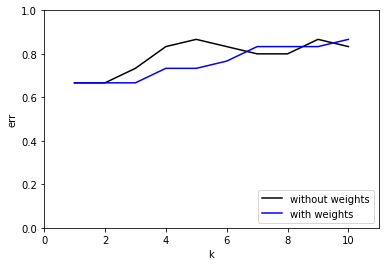

In [72]:
k = [el for el in range(1, k + 1)]
plt.xlabel('k')
plt.ylabel('err')
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.plot(k, err_0, label='without weights',color='k')
plt.plot(k, err_1, label='with weights',color='b')

plt.legend(loc='lower right')
plt.show()

добавим еще несколько способов вычисления весов

In [73]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in k_neighbours:
            w = 1/i
            i += 1
            classes[d[1]] += w # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

k = 10
err_2 = []
for el in range(1, k + 1):
    y_pred = knn(X_train, y_train, X_test, el)
    err_2.append(accuracy(y_pred, y_test))

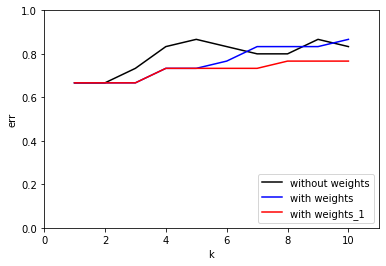

In [74]:
k = [el for el in range(1, k + 1)]
plt.xlabel('k')
plt.ylabel('err')
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.plot(k, err_0, label='without weights',color='k')
plt.plot(k, err_1, label='with weights',color='b')
plt.plot(k, err_2, label='with weights_(1/i)',color='r')
plt.legend(loc='lower right')
plt.show()

на графике видно что добавление весов не всегда приводит к лучшим меетрикам  чем без весов но если подбирать более сложные расчеты и пробовать все это на других данных я думаю веса будут играть значительную роль в расчетах метрик